# Chapter 4. 데이터 시각화

### 시각화 라이브러리

- matplotlib
- seaborn
- plotly

In [30]:
import pandas as pd
import os

# 현재 프로세스의 작업 디렉토리 확인
cur_dir = os.getcwd()

# 현재 작업파일의 경로에 있는 리스트 확인 -> 리스트로 반환
dir_list=os.listdir(cur_dir)

# 특정 경로의 폴더(디렉토리) 생성
#os.mkdir(cur_dir + '\\test2')

# 지정한 파일의 이름을 변경
 # os.rename("바꾸고 싶은 파일","바꿀 이름"

In [31]:
cur_dir + '\\dataset'

'c:\\Users\\BIG3-06\\Documents\\빅데이터\\데이터 분석 실무\\03_06\\dataset'

In [32]:
# 데이터 불러오기
dropout = pd.read_csv('./Dropout/dropout.csv', index_col=0)

### 4-1. 원그래프 그리기

#### 4-1-1. matplotlib

In [33]:
import matplotlib.pyplot as plt
import matplotlib

In [34]:
Target = dropout['Target'].value_counts()

([<matplotlib.patches.Wedge at 0x1a6bff01c90>,
 [Text(-0.0019648313537685594, 1.0999982451975783, 'Graduate'),
  Text(-0.5874439102621013, -0.9300051893919584, 'Dropout'),
  Text(0.9289544349800749, -0.5891041145085052, 'Enrolled')],
 [Text(-0.0010717261929646686, 0.5999990428350426, '50.0569%'),
  Text(-0.3204239510520552, -0.5072755578501591, '31.9536%'),
  Text(0.5067024190800408, -0.32132951700463913, '17.9895%')])

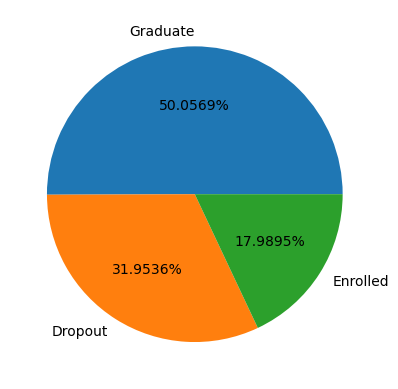

In [35]:
plt.pie(Target, labels = Target.index, autopct="%2.4f%%")

# autopct="%2.4f%%" -> 값 퍼센트 표현 / 2.소수점자리수

4-1-2. plotly

In [36]:
import plotly.express as px

In [37]:
Target = pd.DataFrame(dropout['Target'].value_counts()).reset_index()

# .reset_index() -> 컬럼명 정렬

In [38]:
px.pie(data_frame=Target, values='count', names='Target', title='Target 변수 비율')
# values = 값
# names = 범주

#### 4-2. 막대그래프 그리기

4-2-1. Seaborn - Target 별 성비

In [39]:
import seaborn as sns

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.



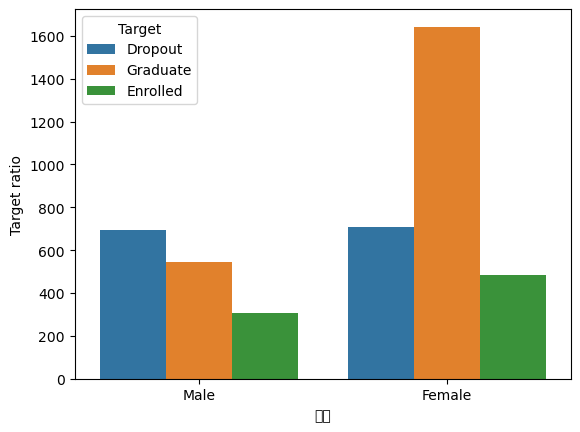

In [40]:
sns.countplot(data = dropout, x='Gender', hue = 'Target', hue_order=['Dropout', 'Graduate', 'Enrolled'])

# plt.xticks(ticks = [0,1], labels = ['Male', 'Female'])
plt.xlabel('성별')
plt.ylabel('Target ratio')
plt.show()

4-2-2. plotly - Target 별 성비

In [41]:
# !pip install ipykernel
# !pip install nbformat
# !pip install --upgrade nbofrmat

In [42]:
pivot_df = dropout.groupby(by = ['Gender', 'Target']).count().reset_index()

In [43]:
# pivot_df.loc[(행), (열)]
# pivot_df.loc[:,] -> 모든 행 가져옴 / [,:] -> 모든 열 가져옴

# pivot_df.iloc[:,0:3] # 인덱싱을 통한 loc는 iloc
pivot_df.loc[:,['Gender', 'Target', 'ID']]

,Gender,Target,ID
0,Female,Dropout,706
1,Female,Enrolled,483
2,Female,Graduate,1643
3,Male,Dropout,695
4,Male,Enrolled,306
5,Male,Graduate,546


In [44]:
pivot_df[['Gender', 'Target', 'ID']]

,Gender,Target,ID
0,Female,Dropout,706
1,Female,Enrolled,483
2,Female,Graduate,1643
3,Male,Dropout,695
4,Male,Enrolled,306
5,Male,Graduate,546


In [45]:
import plotly.graph_objs as go

In [46]:
# 데이터프레임[조건문]
pivot_df[pivot_df['Target']=='Dropout'].Gender

0    Female
3      Male
Name: Gender, dtype: object

In [47]:
trace1 = go.Bar(x=pivot_df[pivot_df['Target']=='Dropout'].Gender,
                y=pivot_df[pivot_df['Target']=='Dropout'].ID,
                name='Dropout')

trace2 = go.Bar(x=pivot_df[pivot_df['Target']=='Enrolled'].Gender,
                y=pivot_df[pivot_df['Target']=='Enrolled'].ID,
                name='Enrolled')

trace3 = go.Bar(x=pivot_df[pivot_df['Target']=='Graduate'].Gender,
                y=pivot_df[pivot_df['Target']=='Graduate'].ID,
                name='Graduate')

datas = [trace1, trace2, trace3]
layouts = go.Layout(title='Target ratio')
fig = go.Figure(data=datas, layout=layouts)
fig.show()

#### 결혼 상태에 따른 Target 변수 비율

In [48]:
def change_val(values):
    if values == 1:
        return 'Single'
    elif values == 2:
        return 'Married'
    elif values == 3:
        return 'Widower'
    elif values == 4:
        return 'Divoced'
    elif values == 5:
        return 'Facto Union'
    elif values == 6:
        return 'Legally Seperated'

In [49]:
dropout['Marital status'] = dropout['Marital status'].apply(change_val)

In [57]:
pd.crosstab(dropout['Marital status'],dropout['Target'])

Target,Dropout,Enrolled,Graduate
Marital status,,,
Divoced,42,16,33
Facto Union,11,3,11
Legally Seperated,4,1,1
Married,177,52,148
Single,1166,717,2001
Widower,1,2,1


In [50]:
marital_df = pd.crosstab(dropout['Marital status'],dropout['Target'])

Text(0, 0.5, 'ratio')

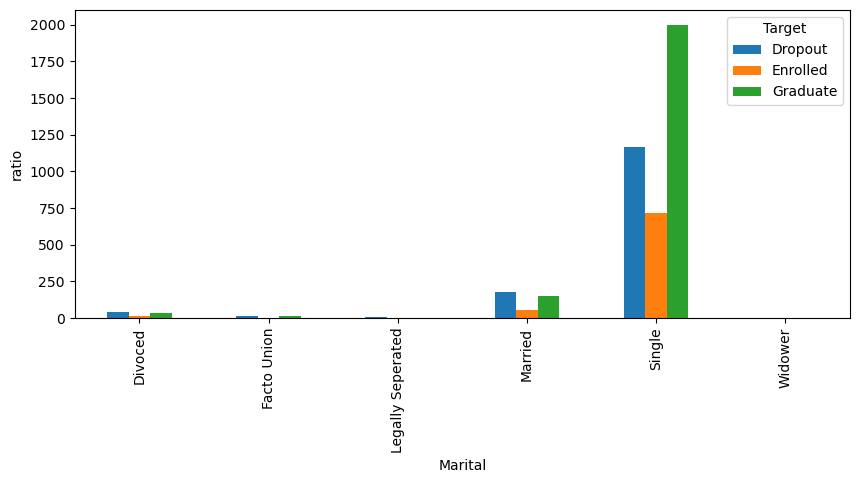

In [51]:
# gropby와 유사 -> crosstab
martial_df = pd.crosstab(dropout['Marital status'], dropout['Target'])
martial_df.plot(kind='bar', figsize = (10,4))
plt.xlabel('Marital')
plt.ylabel('ratio')

#### 결혼 상태에 따른 Target 변수 비율

In [52]:
marital_df2 = dropout.groupby(by = ['Marital status', 'Target']).count().reset_index()
marital_df2 = marital_df2.loc[:, ['Marital status', 'Target', 'ID']]

In [53]:
marital_df2[marital_df2['Target'] == 'Dropout']

,Marital status,Target,ID
0,Divoced,Dropout,42
3,Facto Union,Dropout,11
6,Legally Seperated,Dropout,4
9,Married,Dropout,177
12,Single,Dropout,1166
15,Widower,Dropout,1


In [56]:
trace1 = go.Bar(x=marital_df2[marital_df2['Target']=='Dropout']['Marital status'],
                y=marital_df2[marital_df2['Target']=='Dropout']['ID'], name = 'Dropout')

trace2 = go.Bar(x=marital_df2[marital_df2['Target']=='Enrolled']['Marital status'],
                y=marital_df2[marital_df2['Target']=='Enrolled']['ID'], name = 'Enrolled')

trace3 = go.Bar(x=marital_df2[marital_df2['Target']=='Graduate']['Marital status'],
                y=marital_df2[marital_df2['Target']=='Graduate']['ID'], name = 'Graduate')

data2 = [trace1, trace2, trace3]
layout = go.Layout(barmode = 'group', title='aaa')
fig = go.Figure(data=data2, layout=layout)
fig.show()

#### 전공에 따른 Target 비율

In [72]:
course_df = dropout.groupby(by = ['Course', 'Target']).size().reset_index().pivot(columns='Target', 
                                                                                  index='Course', 
                                                                                  values=0)

In [73]:
course_df

Target,Dropout,Enrolled,Graduate
Course,,,
1.0,8,3,1
2.0,81,37,96
3.0,70,21,123
4.0,85,37,87
5.0,51,41,133
6.0,88,75,171
7.0,92,64,14
8.0,78,20,41
9.0,130,107,137


In [74]:
course_remove = course_df.rename(index={
    1:'Biofuel Production Technologies',
    2:'Animation and Multimedia Design',
    3:'Social Service (Evening Attendance)',
    4:'Agronomy',5:'Communication Design',
    6:'Veterinary Nursing',
    7:'Informatics Engineering',
    8:'Equiniculture',
    9:'Management',
    10:'Social Service',
    11:'Tourism',
    12:'Nursing',
    13:'Oral Hygiene',
    14:'Advertising and Marketing Management',
    15:'Journalism and Communication',
    16:'Basic Education',
    17:'Management (Evening Attendance)'})

<Axes: ylabel='Course'>

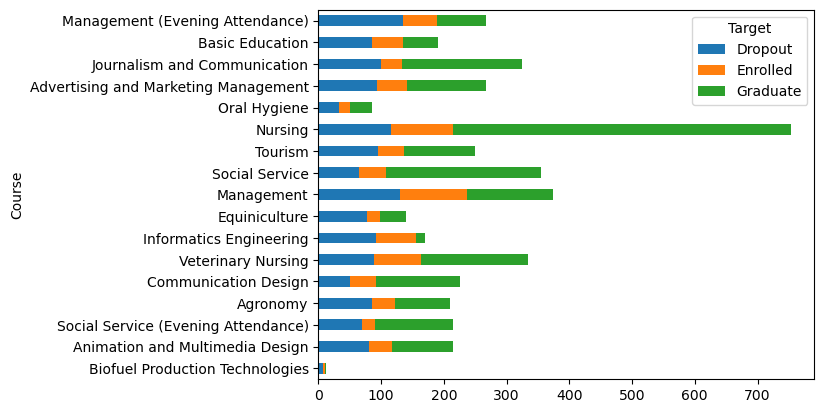

In [81]:
#stacked=True -> 누적형 막대 그래프
course_remove.plot(kind='barh', stacked=True)

In [75]:
course_remove_total = course_remove.sum(axis = 1)

In [76]:
course_remove_total

Course
Biofuel Production Technologies          12
Animation and Multimedia Design         214
Social Service (Evening Attendance)     214
Agronomy                                209
Communication Design                    225
Veterinary Nursing                      334
Informatics Engineering                 170
Equiniculture                           139
Management                              374
Social Service                          355
Tourism                                 250
Nursing                                 753
Oral Hygiene                             85
Advertising and Marketing Management    267
Journalism and Communication            325
Basic Education                         191
Management (Evening Attendance)         267
dtype: int64

In [78]:
course_remove_sorted = course_remove_total.sort_values(ascending=True)

# ascending -> 오름차순

<Axes: ylabel='Course'>

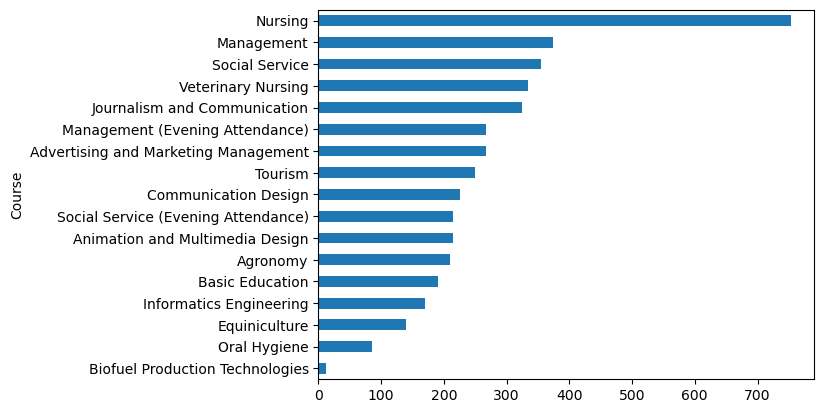

In [79]:
#stacked=True -> 누적형 막대 그래프
course_remove_sorted.plot(kind='barh', stacked=True)

In [ ]:
# 열을 기준으로 각 범주별 총합 계산


# 총합을 기준으로 오름차순 정렬


#### 전공에 따른 Target 비율 -> plotly 라이브러리 사용

In [83]:
# count -> null값은 countX
# size -> null값도 포함
course_df2 = dropout.groupby(by=['Course', 'Target']).size().reset_index().rename(columns={0:'count'})


In [84]:
course_df2

,Course,Target,count
0,1.0,Dropout,8
1,1.0,Enrolled,3
2,1.0,Graduate,1
3,2.0,Dropout,81
4,2.0,Enrolled,37
5,2.0,Graduate,96
6,3.0,Dropout,70
7,3.0,Enrolled,21
8,3.0,Graduate,123
9,4.0,Dropout,85


In [87]:
fix = px.bar(course_df2, x='Course', y='count', color='Target')
fix.show()

In [ ]:
name_list = ['Biofuel Production Technologies',
    'Animation and Multimedia Design',
    'Social Service (Evening Attendance)',
    'Agronomy',
    'Communication Design',
    'Veterinary Nursing',
    'Informatics Engineering',
    'Equiniculture',
    'Management',
    'Social Service',
    'Tourism',
    'Nursing',
    'Oral Hygiene',
    'Advertising and Marketing Management',
    'Journalism and Communication',
    'Basic Education',
    'Management (Evening Attendance)']

In [ ]:
def change_course_val(values):
    for idx in range(2, 18):
        if values == 1:
            return 'Biofuel Production Technologies'
        elif values == idx:
            return name_list[idx-1]

#### 국적에 따른 Target 비율

In [90]:
nation_df = dropout.groupby(by = ['Nationality', 'Target']).size().reset_index().pivot(columns = 'Target',
                                                                         index = 'Nationality',
                                                                         values = 0)

In [91]:
nation_df = nation_df.sum(axis = 1)
nation_df = nation_df.sort_values(ascending=True)

<Axes: ylabel='Nationality'>

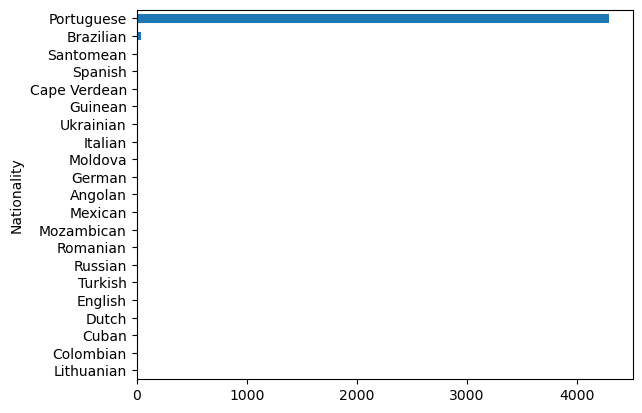

In [92]:
nation_df.plot(kind='barh', stacked=True)

In [ ]:
nation_df = nation_df.rename(index={1:'Portuguese',
                                    2:'German',
                                    3:'Spanish',
                                    4:'Italian',
                                    5:'Dutch',
                                    6:'English',
                                    7:'Lithuanian',
                                    8:'Angolan',
                                    9:'Cape Verdean',
                                    10:'Guinean',
                                    11:'Mozambican',
                                    12:'Santomean',
                                    13:'Turkish',
                                    14:'Brazilian',
                                    15:'Romanian',
                                    16:'Moldova',
                                    17:'Mexican',
                                    18:'Ukrainian',
                                    19:'Russian',
                                    20:'Cuban', 
                                    21:'Colombian'})

#### 국적에 따른 Target 비율 -> plotly 라이브러리 사용

In [94]:
nation_df2=dropout.groupby(by = ['Nationality', 'Target']).size().reset_index().rename(columns={0:'count'})

In [95]:
fig = px.bar(nation_df2, x='Nationality', y='count', color='Target')
fig.show()

#### 연령대 분포도 그리기 -> seaborn

In [96]:
dropout['Age at enrollment']

0       20.0
1       19.0
2       19.0
3       20.0
4       45.0
        ... 
4394    19.0
4395    18.0
4396    30.0
4397    20.0
4398    22.0
Name: Age at enrollment, Length: 4399, dtype: float64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



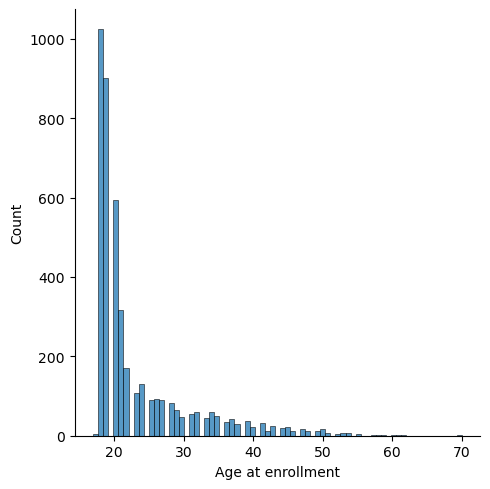

In [99]:
fig = sns.displot(data = dropout, x='Age at enrollment')
plt.show()

#### 연령대 분포도 그리기 -> plotly 라이브러리 사용

In [100]:
age_df = dropout.groupby(by=['Age at enrollment']).size().reset_index().rename(columns={0:'count'})
age_df

,Age at enrollment,count
0,17.0,5
1,18.0,1024
2,19.0,902
3,20.0,595
4,21.0,316
5,22.0,171
6,23.0,107
7,24.0,130
8,25.0,91
9,26.0,92


In [107]:
fig = px.histogram(age_df, x='Age at enrollment', y='count', marginal='box')
fig.show()

### 산점도 그리기

##### 첫 학기 등록 학점과 첫 학기 취득한 학점 간의 관계

In [108]:
dropout.columns

Index(['ID', 'Nationality', 'Gender', 'Target', 'Marital status',
       'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Scholarship holder', 'Age at enrollment', 'International', 'Education',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular

In [109]:
x_df = dropout['Curricular units 1st sem (credited)']
y_df = dropout['Curricular units 1st sem (enrolled)']

In [112]:
import plotly.offline as pyo

In [114]:
trace1 = go.Scatter(x=x_df, y=y_df, mode = 'markers')
data = [trace1]
pyo.iplot(data)

### 히트맵 그리기 -> 변수 선택

In [124]:
# 인구통계학 데이터

demo_data = dropout[["Marital status", "Nationality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# 사회-경제 데이터
se_data = dropout[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# 미시경제 데이터
me_data = dropout[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# 학업 데이터
academic_data = dropout[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]

### 인구통계학 데이터 히트맵

In [118]:
demo_data = demo_data[['Displaced', 'Age at enrollment', 'International']]

In [119]:
demo_data.corr()

,Displaced,Age at enrollment,International
Displaced,1.000000,-0.363031,-0.013693
Age at enrollment,-0.363031,1.000000,-0.005323
International,-0.013693,-0.005323,1.000000


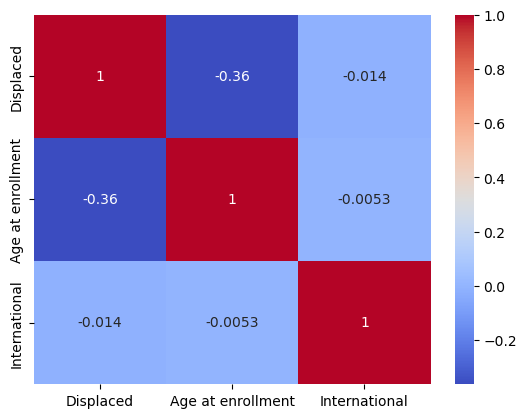

In [123]:
sns.heatmap(demo_data.corr(), annot=True, cmap='coolwarm') # annot = 상관계수값 넣기
plt.show()

#### 학업 데이터 히트맵

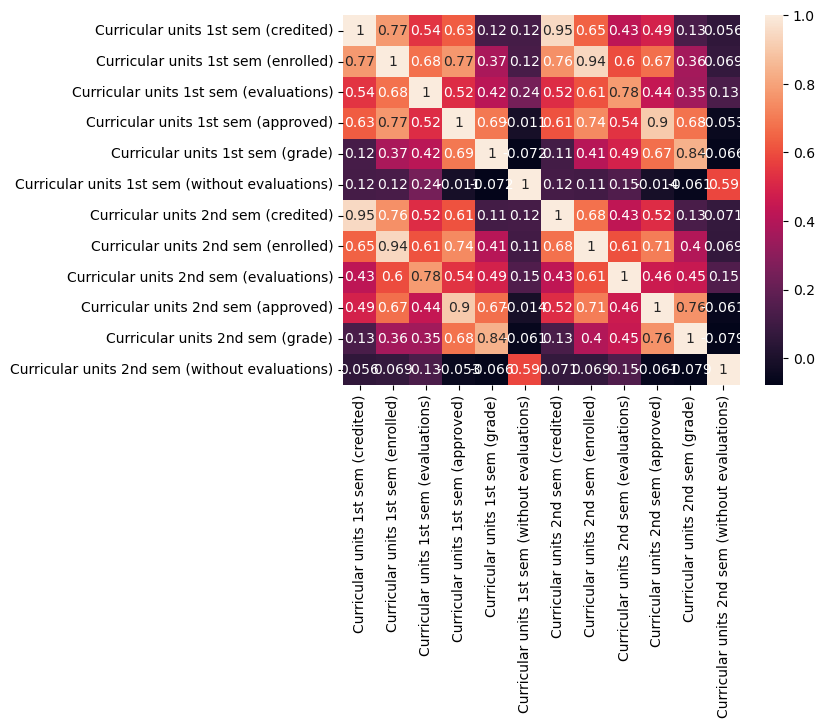

In [126]:
sns.heatmap(academic_data.corr(), annot=True)
plt.show()

## Chapter 5. 모델링 (예측 분류)

In [ ]:
import pandas as pd
dropout = pd.read_csv('./dropout.csv', index_col=0)

mean = dropout['GDP'].mean()
std = dropout['GDP'].std()
zscore = (dropout['GDP'] - mean) / std   # 1.96

# dropout['조건문']

dropout[abs((dropout['GDP'] - mean) / std) < 1.96]

In [ ]:
GDP = dropout['GDP']

q1 = GDP.quantile(0.25)
q2 = GDP.quantile(0.5)
q3 = GDP.quantile(0.75)
q4 = GDP.quantile(0.1)

IQR = q3 - q1

upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR

In [ ]:
# lower ~ upper
# 방법1 : dropout[() & ()]
dropout[(dropout['GDP'] >= lower) & (dropout['GDP'] <= upper)]

# 방법2 : .between()
dropout[dropout['GDP'].between(lower, upper)]

In [ ]:
# 데이터 타입 변경
dropout = dropout.astype({"Marital status" : 'object',
                         "Application mode" : 'object',
                         "Course" : 'object',
                         "Daytime/evening attendance" : 'object',
                         "Previous qualification" : 'object',
                         "Mother's qualification" : 'object',
                         "Father's qualification" : 'object',
                         "Mother's occupation" : 'object',
                         "Father's occupation" : 'object',
                         "Displaced" : 'object',
                         "Educational special needs" : 'object',
                         "Debtor" : 'object',
                         "Tuition fees up to date" : 'object',
                         "Scholarship holder" : 'object',
                         "International" : 'object'})

### 5-1. 데이터 인코딩(범주형)
5-1-1) One-Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = OneHotEncoder()

encoder.fit(dropout['Nationality'].values.reshape(-1, 1))
nations = encoder.transform(dropout['Nationality'].values.reshape(-1, 1))
nations = nations.toarray()

### 5-2. 데이터 인코딩(수치형)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 스케일러 객체 생성
scaler = MinMaxScaler()

# 스케일러 학습 (fit)
minmax = scaler.fit(dropout['Inflation rate'].values.reshape(-1, 1))

# scaling
dropout['Inflation rate_re'] = minmax.transform(dropout['Inflation rate'].values.reshape(-1, 1))

### 5-3. Target & Input 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=777)

### 5-4. 데이터 샘플링
- Over-Sampling : 개수가 적은 범주를 기준으로 샘플링
- Under-Sampling : 개수가 많은 범주를 기준으로 샘플링

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 샘플링 객체 생성
ros = RandomUnderSampler()
# dropout['Target'].value_counts()   # 샘플링 전 개수
# 샘플링
X_ros, y_ros = ros.fit_resample(X_train, y_train)
# y_ros.value_counts()   # 샘플링 후 개수


# 샘플링 객체 생성
ros = RandomOverSampler()
# dropout['Target'].value_counts()   # 샘플링 전 개수
# 샘플링
X_ros, y_ros = ros.fit_resample(X_train, y_train)
# y_ros.value_counts()   # 샘플링 후 개수

### 5-5. 모델 불러오기

In [ ]:
from sklearn.ensemble import RandomForestClassifier   # 랜덤포레스트
from sklearn import tree   # 의사결정나무

# 의사결정나무
# 모델 생성
DT = tree.DecisionTreeClassifier()

# 랜덤 포레스트
# 모델 생성
RF = RandomForestClassifier()

# 모델 학습(기출문제)
RF.fit(X_ros, y_ros)
# 모델 예측(수능문제)
y_pred = RF.predict(X_test)

#### 5-6. 모델 예측 및 성능 확인

In [ ]:
# 모델 성능 확인
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

print(accuracy_score(y_test, y_pred))   # (실제값, 예측값)
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

report = classification_report(y_test, y_pred)
print(report)